In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [42]:
cmap = sns.color_palette("tab10")
cmap = sns.color_palette("rocket")


In [21]:
words_list = ['adrian', 'adrian', 'adrian', 'jinich', 'jinich', 'garza']
words = ' '.join(words_list)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10, colormap='tab10').generate(words)

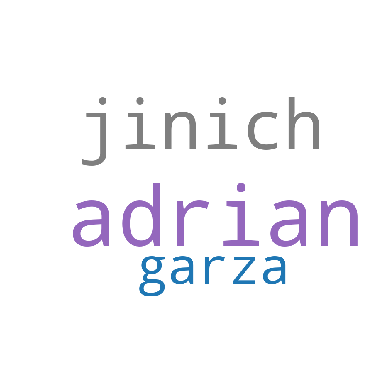

In [51]:
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 


In [15]:
def get_gene_data(rv, df_data, cols_data):
    df_rv = df_data[df_data.Rv_ID==rv]
    rv_data = df_rv[cols_data].values[0]
    return rv_data


def get_common_screens(rv_query, rv_nns, df_data, cols_data):
    list_rna_common = []
    list_tnseq_common = []
    for rv_nn in rv_nns:

        rv_1_data = get_gene_data(rv_query, df_data, cols_data)
        rv_2_data = get_gene_data(rv_nn, df_data, cols_data)

        # "significant" RNA screens:
        rv_1_inds_rnaseq_sig = [i for i in inds_rnaseq if np.abs(rv_1_data[i])>=1]
        rv_2_inds_rnaseq_sig = [i for i in inds_rnaseq if np.abs(rv_2_data[i])>=1]

        # "significant" TnSeq screens:
        rv_1_inds_tnseq_sig = [i for i in inds_tnseq if np.abs(rv_1_data[i])==1]
        rv_2_inds_tnseq_sig = [i for i in inds_tnseq if np.abs(rv_2_data[i])==1]

        # shared/common screens
        rna_common = list(set(cols_data[rv_1_inds_rnaseq_sig]).intersection(set(cols_data[rv_2_inds_rnaseq_sig])))
        rna_common_int = [int(ind) for ind in rna_common]
        rna_exp_ids = df_rna_annot.iloc[rna_common_int].Experiment_id.tolist()

        tnseq_common = list(set(cols_data[rv_1_inds_tnseq_sig]).intersection(set(cols_data[rv_2_inds_tnseq_sig])))

        list_rna_common.append(rna_exp_ids)
        list_tnseq_common.append(tnseq_common)

    df_nn_common = pd.DataFrame()
    df_nn_common['rv_query']= [rv_query]*len(list_rna_common)
    df_nn_common['rv_neighbor'] = rv_nns
    df_nn_common['common_rna'] = list_rna_common
    df_nn_common['common_tnseq'] = list_tnseq_common
    
    return df_nn_common

#### A little hack to get the colombos columns/indices to match: 

In [16]:
# load TnSeq / expression data:

file_data = '../data/integrated_rnaseq_tnseq_v1.csv'
df_data = pd.read_csv(file_data)
cols = df_data.columns.tolist()
cols_data = np.array(df_data.columns[11:].tolist())
#expression vs. TnSeq data:
inds_rnaseq = [i for i in range(len(cols_data)) if not 'vs' in cols_data[i]]
inds_tnseq = [i for i in range(len(cols_data)) if 'vs' in cols_data[i]]

#column renaming: 
dict_temp = {cols_data[inds_rnaseq[i]]:str(i) for i in range(len(inds_rnaseq))}
df_data.rename(columns=dict_temp, inplace=True)

## Do I need to repeat this? 
cols_data = np.array(df_data.columns[11:].tolist())

In [8]:
# expression annotation data:
file_rna_annot = '../data/experiment_annotation_master_colombos_v0.csv'
df_rna_annot = pd.read_csv(file_rna_annot)

In [9]:
col_int = [int(c) for c in cols_data[inds_rnaseq] ]

In [10]:
rv_query = 'Rv1460'
rv_nns = ['Rv1461', 'Rv1462', 'Rv1463', 'Rv1464', 'Rv1465', 'Rv1466']

In [64]:
rv_nn = 'Rv3214'
rv_1_data = get_gene_data(rv_query, df_data, cols_data)
rv_2_data = get_gene_data(rv_nn, df_data, cols_data)

# "significant" RNA screens:
rv_1_inds_rnaseq_sig = [i for i in inds_rnaseq if np.abs(rv_1_data[i])>=1]
rv_2_inds_rnaseq_sig = [i for i in inds_rnaseq if np.abs(rv_2_data[i])>=1]

# "significant" TnSeq screens:
rv_1_inds_tnseq_sig = [i for i in inds_tnseq if np.abs(rv_1_data[i])==1]
rv_2_inds_tnseq_sig = [i for i in inds_tnseq if np.abs(rv_2_data[i])==1]

rna_common = list(set(cols_data[rv_1_inds_rnaseq_sig]).intersection(set(cols_data[rv_2_inds_rnaseq_sig])))
rna_common_int = [int(ind) for ind in rna_common]


In [11]:
df_nn_common = get_common_screens(rv_query, rv_nns, df_data, cols_data)
df_nn_common

,rv_query,rv_neighbor,common_rna,common_tnseq
0,Rv1460,Rv1461,"[GSE1642, GSE16146, GSE1642, GSE6750, GSE3201,...",[]
1,Rv1460,Rv1462,"[GSE1642, GSE16146, GSE16146, GSE16811, GSE796...",[]
2,Rv1460,Rv1463,"[GSE1642, GSE16811, GSE6209, GSE6750, GSE6750,...",[]
3,Rv1460,Rv1464,"[GSE1642, GSE7962, GSE16146, GSE6750, GSE3201,...",[]
4,Rv1460,Rv1465,"[GSE1642, GSE1642, GSE16146, GSE16146, GSE1642...",[]
5,Rv1460,Rv1466,"[GSE7962, GSE1642, GSE1642, GSE16146, GSE16146...",[]
